## Twitter photos predictions dataset Wrangling


## Table of Contents
- [Introduction](#intro)
- [Gather](#gather)
- [Assess](#assess)
- [Clean](#clean)

-------
<a id='intro'></a>
## Introduction

This dataset is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.
________

<a id='gather'></a>
## **Gather Data**

*Import libraries*

In [4]:
import pandas as pd
import numpy as np 
import seaborn as sb
import tweepy
import requests 
import os
import json
from functools import reduce
import matplotlib.pyplot as plt
% matplotlib inline 

UsageError: Line magic function `%` not found.


*Import doges data predections* 

In [5]:
#import the images predictions dataframe
folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [6]:
#read the tsv file 
image = pd.read_csv('image-predictions.tsv', sep = '\t')
image.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


*Import twitter data API*

In [7]:
#importing the data API as JSON file
twitter_df = pd.read_json('tweet-json.txt', lines = True)
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
id                               2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

*Import twitter archive dataframe* 

In [8]:
#import the data frame 
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


***
<a id='assess'></a>
## **Assess Data**

In [9]:
#Make a copy for the clean dataframes 
clean_image = image.copy()
clean_twitter = twitter_df.copy()
clean_archive = archive_df.copy()

#### *Assessment of prediction data*

In [10]:
#take a sample to manually assess the data
clean_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
677,683481228088049664,https://pbs.twimg.com/media/CXw2jSpWMAAad6V.jpg,1,keeshond,0.508951,True,chow,0.442016,True,German_shepherd,0.013206,True
1535,790337589677002753,https://pbs.twimg.com/media/CvfX2AnWYAAQTay.jpg,1,Pembroke,0.658808,True,Cardigan,0.153096,True,toy_terrier,0.102299,True
1072,716791146589110272,https://pbs.twimg.com/media/CfKNvU8WsAAvI9Z.jpg,1,Pomeranian,0.468751,True,seat_belt,0.154652,False,golden_retriever,0.125017,True
466,675015141583413248,https://pbs.twimg.com/media/CV4iqh5WcAEV1E6.jpg,1,street_sign,0.290091,False,golden_retriever,0.258372,True,sandbar,0.132173,False
863,697259378236399616,https://pbs.twimg.com/media/Ca0ps3AXEAAnp9m.jpg,1,Great_Dane,0.999223,True,boxer,0.000187,True,whippet,0.000151,True


In [11]:
#check the types of the data
clean_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
#checking the duplicates in the images
clean_image.jpg_url.duplicated().sum()

66

In [13]:
#Checking value counts for first prediction 
clean_image.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
alp                     1
jersey                  1
tricycle                1
trombone                1
bannister               1
Name: p1, Length: 378, dtype: int64

In [14]:
#Checking value counts for second prediction 
clean_image.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
snail                   1
cowboy_hat              1
paper_towel             1
cowboy_boot             1
ashcan                  1
Name: p2, Length: 405, dtype: int64

In [15]:
#Checking value counts for third prediction 
clean_image.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
consomme               1
bulletproof_vest       1
canoe                  1
Sussex_spaniel         1
grand_piano            1
Name: p3, Length: 408, dtype: int64

In [16]:
#Checking null values in first prediction 
clean_image.p1.isnull().sum()

0

In [17]:
#Checking null values in image url
clean_image.jpg_url.isnull().sum()

0

#### *Assessment of twitter data*

In [18]:
#Assessing data manually 
clean_twitter.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
91,2017-06-12 16:06:11+00:00,874296783580663808,874296783580663808,This is Jed. He may be the fanciest pupper in ...,False,"[0, 114]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 874296776056078336, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,26651,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1997,2015-12-03 21:11:09+00:00,672523490734551040,672523490734551040,When she says she'll be ready in a minute but ...,False,"[0, 126]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 672523487219728384, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,696,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2163,2015-11-25 04:11:57+00:00,669367896104181761,669367896104181760,This is Chip. Chip's pretending to be choked. ...,False,"[0, 92]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669367892388003840, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,485,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
308,2017-02-25 17:06:32+00:00,835536468978302976,835536468978302976,RT @dog_rates: Meet Lola. Her hobbies include ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Fri Feb 24 23:04:14 +0000 2017...,NaN,NaN,NaN
1785,2015-12-17 19:07:09+00:00,677565715327688705,677565715327688704,Contortionist pup here. Inside pentagram. Clea...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 677565708809695232, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1409,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [19]:
#check the types of the data
clean_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
id                               2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

In [20]:
#checkining hidden columns
clean_twitter['retweeted_status']
clean_twitter['retweeted']
clean_twitter['is_quote_status']

0       False
1       False
2       False
3       False
4       False
        ...  
2349    False
2350    False
2351    False
2352    False
2353    False
Name: is_quote_status, Length: 2354, dtype: bool

#### *Assessment of archive data*

In [21]:
#Assessing data manually 
clean_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
919,756526248105566208,NaN,NaN,2016-07-22 16:28:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",All hail sky doggo. 13/10 would jump super hig...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756526248...,13,10,None,doggo,None,None,None
1085,738184450748633089,NaN,NaN,2016-06-02 01:44:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","For the last time, we only rate dogs. Pls stop...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/738184450...,9,10,None,None,None,None,None
980,749774190421639168,NaN,NaN,2016-07-04 01:17:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's a Benebop Cumberplop. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749774190...,12,10,Lucy,None,None,None,None
823,770069151037685760,NaN,NaN,2016-08-29 01:22:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Carbon. This is his first time sw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770069151...,10,10,Carbon,None,None,None,None
1913,674372068062928900,NaN,NaN,2015-12-08 23:36:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chesney. On the outside he stays calm &am...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674372068...,10,10,Chesney,None,None,None,None
1328,705970349788291072,NaN,NaN,2016-03-05 04:17:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's a Venetian Kerploof. Suppo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705970349...,12,10,Lucy,None,None,None,None
1582,687109925361856513,NaN,NaN,2016-01-13 03:12:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Baxter. He looks like a fun dog. Prefe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687109925...,11,10,Baxter,None,None,None,None
1343,704761120771465216,NaN,NaN,2016-03-01 20:11:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper killed this great white in an epic...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704761120...,13,10,None,None,None,pupper,None
1818,676593408224403456,NaN,NaN,2015-12-15 02:43:33 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper loves leaves. 11/10 for committed ...,NaN,NaN,NaN,https://vine.co/v/eEQQaPFbgOY,11,10,None,None,None,pupper,None
1745,679148763231985668,NaN,NaN,2015-12-22 03:57:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I know everyone's excited for Christmas but th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679148763...,8,10,None,None,None,None,None


In [22]:
#checking data null values and data type
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

---
<a id='clean'></a>
## **Clean Data**

**1. Quality issues**

*Image Prediction data*
* There is duplicates in colmun  `image url` 
* Upper case letters in columns `p1`, `p2`, `p3`

*Twiter API data*
* Unecessery columns for analysis: `id_srt`, `in_reply_to_status_id`, `in_reply_to_status_id_str`, `in_reply_to_user_id`, `in_reply_to_user_id_str`, `in_reply_to_screen_name`, `entities`, `truncated`, `user`
* Null columns: `coordinates`, `place`, `contributors`, `is_quote_status`
*  `created at` should be `timestamp`
* `id` should be `tweet id` for cohearncy 
* 'lang' column should be category datatype

*Twitter Archive data*
* No need for columns of rewteer info. and text and replys
* `timestamp` column is date not string
* Doges names missing and wrong like "a", "very"


**2. Tidness issues**
* The dogs breed should be in one column
* twitter data in the three dataframes seprated 


### 1. **Quality issues**


### *Cleanning of image prediction data*

##### Define: Remove all dupliates from `image url` column

##### Code

In [23]:
#Drop duplicates 
clean_image.jpg_url.drop_duplicates(inplace = True)

##### Test

In [24]:
#get the sum of the duplicates in the column
clean_image.jpg_url.duplicated().sum()

0

<div class="alert alert-block alert-success">
<b>Success</b> If the number of duplicates in the test become 0
</div>

##### Define: Transform all the columns instances into lowercase data

##### Code

In [25]:
#change each column data into lower case
clean_image['p1'] =clean_image.p1.str.lower()
clean_image['p2'] =clean_image.p2.str.lower()
clean_image['p3'] =clean_image.p3.str.lower()

##### Test

In [26]:
#display the counts of the values of each column
clean_image.p1.value_counts()
clean_image.p2.value_counts()
clean_image.p3.value_counts()

labrador_retriever    79
chihuahua             58
golden_retriever      48
eskimo_dog            38
kelpie                35
                      ..
tripod                 1
dugong                 1
kimono                 1
gorilla                1
grand_piano            1
Name: p3, Length: 408, dtype: int64

<div class="alert alert-block alert-success">
<b>Success</b> If the counts are all lowercase  
</div>

### *Cleanning of Twiter API data*

##### Define: Drop all unnecessry columns

##### Code

In [27]:
#remove the columns 
clean_twitter.drop(['id_str', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'entities', 'truncated','geo'], axis = 1, inplace = True) 

In [28]:
#remove rest of the columns
clean_twitter.drop(['user'], axis = 1, inplace = True) 

##### Test

In [29]:
#display dataframe first 5 rows
clean_twitter.head()

,created_at,id,full_text,display_text_range,extended_entities,source,coordinates,place,contributors,is_quote_status,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,False,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,"[0, 138]","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,False,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,False,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,"[0, 79]","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,False,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,"[0, 138]","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,False,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Success</b> If the unneccsery columns doesn't exist anymore  
</div>

##### Define: Remove null columns as it have the same instance 

##### Code

In [30]:
#remove the columns
clean_twitter.drop(['coordinates', 'place', 'contributors', 'is_quote_status'], axis = 1, inplace = True) 

<div class="alert alert-block alert-warning">
<b>Note</b> 'place' column have one entity but it has no value anyymore 
</div>

##### Test

In [31]:
#display dataframe first 5 rows
clean_twitter.head()

,created_at,id,full_text,display_text_range,extended_entities,source,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",8853,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,"[0, 138]","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",6514,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",4328,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,"[0, 79]","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",8964,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,"[0, 138]","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",9774,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Success</b> If the null columns doesn't exist anymore  
</div>

##### Define: Change `created_at` to `timestamp` for consistancy of entities 

##### Code

In [32]:
#change the column name
clean_twitter.rename(columns={"created_at": "timestamp"}, inplace=True)

##### Test

In [33]:
#display dataframe info
clean_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 17 columns):
timestamp                        2354 non-null datetime64[ns, UTC]
id                               2354 non-null int64
full_text                        2354 non-null object
display_text_range               2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
retweet_count                    2354 non-null int64
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
retweeted                        2354 non-null bool
possibly_sensitive               2211 non-null float64
possibly_sensitive_appealable    2211 non-null float64
lang                             2354 non-null object
retweeted_status                 179 non-null object
quoted_status_id                 29 non-null float64
quoted_status_id_str             29 non-null float64
quoted_status           

<div class="alert alert-block alert-success">
<b>Success</b> If the column name chaned correctly 
</div>

##### Define: Change  `id`column name to  `tweet id` for cohearncy 

##### Code

In [34]:
#rename the id column 
clean_twitter.rename(columns={"id": "tweet_id"}, inplace=True)

##### Test

In [35]:
#display dataframe first 5 instances
clean_twitter.head()

,timestamp,tweet_id,full_text,display_text_range,extended_entities,source,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",8853,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,"[0, 138]","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",6514,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",4328,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,"[0, 79]","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",8964,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,"[0, 138]","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",9774,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Success</b> If the column name chaned correctly 
</div>

##### Define: Change `lang` column to be category datatype

##### Code

In [36]:
#change column data type
clean_twitter['lang'] = clean_twitter['lang'].astype('category')

##### Test

In [37]:
#display dataframe info
clean_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 17 columns):
timestamp                        2354 non-null datetime64[ns, UTC]
tweet_id                         2354 non-null int64
full_text                        2354 non-null object
display_text_range               2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
retweet_count                    2354 non-null int64
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
retweeted                        2354 non-null bool
possibly_sensitive               2211 non-null float64
possibly_sensitive_appealable    2211 non-null float64
lang                             2354 non-null category
retweeted_status                 179 non-null object
quoted_status_id                 29 non-null float64
quoted_status_id_str             29 non-null float64
quoted_status         

<div class="alert alert-block alert-success">
<b>Success</b> If the column type turend from object to category 
</div>

### *Cleanning of Twitter Archive data*

##### Define: Remove columns of rewteet info. and text

##### Code

In [38]:
#remove the columns
clean_archive.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True) 

In [39]:
#remove rest of the columns
clean_archive.drop(['text', 'in_reply_to_user_id', 'in_reply_to_status_id'], axis = 1, inplace = True) 

##### Test

In [40]:
#display dataframe info
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(8)
memory usage: 202.6+ KB


<div class="alert alert-block alert-success">
<b>Success</b> If thier are no longer the unnecessary columns
</div>

##### Define: Change `timestamp` column from string datatype tp  date

##### Code

In [41]:
#change the data type into date with timezone 
clean_archive['timestamp'] = clean_archive['timestamp'].astype('datetime64[ns]')

##### Test

In [42]:
#display dataframe info
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 202.6+ KB


<div class="alert alert-block alert-success">
<b>Success</b> If timestamp column become ==> datetime64[ns]
</div>

##### Define: Remove corrupted names 

##### Code

In [43]:
#cleaning dogs names
clean_archive.name = clean_archive.name.str.replace('^[a-z]+', 'None')

##### Test

In [44]:
#display the counts of the names
clean_archive.name.value_counts()

None       854
Charlie     12
Cooper      11
Oliver      11
Lucy        11
          ... 
Brandy       1
Bayley       1
Blipson      1
Champ        1
Holly        1
Name: name, Length: 932, dtype: int64

<div class="alert alert-block alert-success">
<b>Success</b> If the courrpated dogs names is removed
</div>

### 2. **Tidness issues**

##### Define:  make one column with dogs breed only 

##### Code

In [45]:
#join the four columns in one column 
clean_archive['stage'] = clean_archive[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1) 
#get rid of the None in the sentce to get the stage out of it 
clean_archive['stage'].replace("NoneNoneNoneNone","None ", inplace=True)
clean_archive['stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
clean_archive['stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
clean_archive['stage'].replace("NoneNonepupperNone","pupper", inplace=True)
clean_archive['stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)
#drop the dogs columns 
clean_archive.drop(['doggo','floofer', 'pupper','puppo'], axis=1, inplace= True)

##### Test

In [46]:
#display dataframe first five rows 
clean_archive.head()

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


<div class="alert alert-block alert-success">
<b>Success</b> if the value counts have no wrong dogs names
</div>

##### Define:  Merge the three dataframes 

##### Code

In [47]:
#merge the three dataframes on the common column of tweet id 
Twitter_data = pd.merge(pd.merge(clean_image,clean_twitter,on='tweet_id'),clean_archive,on='tweet_id')

> Source: https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns

##### Test

In [48]:
#display the dataframe and its info
Twitter_data
Twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 35 columns):
tweet_id                         2073 non-null int64
jpg_url                          2073 non-null object
img_num                          2073 non-null int64
p1                               2073 non-null object
p1_conf                          2073 non-null float64
p1_dog                           2073 non-null bool
p2                               2073 non-null object
p2_conf                          2073 non-null float64
p2_dog                           2073 non-null bool
p3                               2073 non-null object
p3_conf                          2073 non-null float64
p3_dog                           2073 non-null bool
timestamp_x                      2073 non-null datetime64[ns, UTC]
full_text                        2073 non-null object
display_text_range               2073 non-null object
extended_entities                2073 non-null object
source_x             

## Data Visualizations

In [49]:
#making a dataframe that contain only the right stage of the dogs 
dogs_stage = Twitter_data[(Twitter_data['stage']=='pupper') + (Twitter_data['stage']=='doggo') + (Twitter_data['stage']=='puppo') + (Twitter_data['stage']=='floofer')]
dogs_stage

C:\Users\Rana Samir\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,quoted_status_id,quoted_status_id_str,quoted_status,timestamp_y,source_y,expanded_urls,rating_numerator,rating_denominator,name,stage
333,672160042234327040,https://pbs.twimg.com/media/CVP9_beUEAAwURR.jpg,1,pug,0.561027,True,french_bulldog,0.222114,True,labrador_retriever,...,NaN,NaN,NaN,2015-12-02 21:06:56,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/672160042...,8,10,Bubba,pupper
335,672205392827572224,https://pbs.twimg.com/media/CVQnPMrVAAAzShR.jpg,1,carton,0.952613,False,crate,0.035376,False,pug,...,NaN,NaN,NaN,2015-12-03 00:07:09,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/672205392...,9,10,Opal,pupper
341,672254177670729728,https://pbs.twimg.com/media/CVRTmz1WcAA4uMF.jpg,1,pug,0.979487,True,french_bulldog,0.016850,True,norwegian_elkhound,...,NaN,NaN,NaN,2015-12-03 03:21:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,pupper
348,672481316919734272,https://pbs.twimg.com/media/CVUiMUeW4AEQgkU.jpg,1,border_collie,0.599454,True,collie,0.106227,True,shetland_sheepdog,...,NaN,NaN,NaN,2015-12-03 18:23:34,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,pupper
355,672594978741354496,https://pbs.twimg.com/media/CVWJkJXWsAInlZl.jpg,1,great_pyrenees,0.755945,True,old_english_sheepdog,0.082337,True,afghan_hound,...,NaN,NaN,NaN,2015-12-04 01:55:13,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/672594978...,9,10,Scott,pupper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,884162670584377345,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,german_shepherd,0.707046,True,malinois,0.199396,True,norwegian_elkhound,...,NaN,NaN,NaN,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo
2044,886366144734445568,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,1,french_bulldog,0.999201,True,chihuahua,0.000361,True,boston_bull,...,NaN,NaN,NaN,2017-07-15 23:25:31,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,pupper
2058,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,labrador_retriever,0.013834,True,redbone,...,NaN,NaN,NaN,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo
2060,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,pembroke,0.966327,True,cardigan,0.027356,True,basenji,...,NaN,NaN,NaN,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/889665388...,13,10,None,puppo


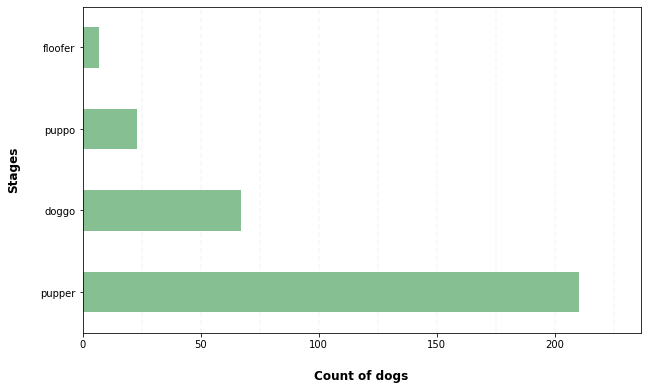

In [50]:
#drawing horizontal bar chart for the dog's stages 
ax = dogs_stage['stage'].value_counts().plot(kind='barh', figsize=(10,6), color='#86bf91', zorder=2, width=0.5);
# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # Set x-axis label
ax.set_xlabel("Count of dogs", labelpad=20, weight='bold', size=12)

  # Set y-axis label
ax.set_ylabel("Stages", labelpad=20, weight='bold', size=12);

> source: https://mode.com/example-gallery/python_horizontal_bar/

The above graph shows that most of the dogs in the tweets was from pupper stage 

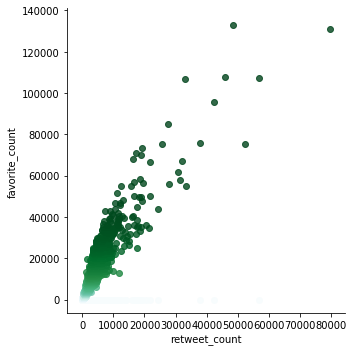

In [51]:
sb.lmplot( x='retweet_count', y='favorite_count', data=Twitter_data, fit_reg=False, hue='favorite_count', legend=False, palette="BuGn");

The above graph shows that the favourite counts on dogs photos have a positive relationship with the retweets counts

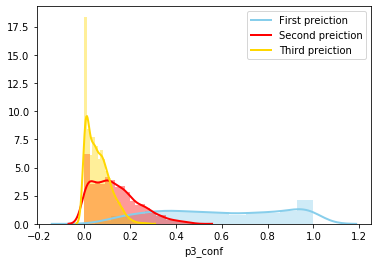

In [65]:
# drawing histograms for dogs predictions 
sb.distplot( Twitter_data["p1_conf"] , color="skyblue",kde_kws={"lw": 2, "label": "First preiction"});
sb.distplot( Twitter_data["p2_conf"] , color="red", kde_kws={"lw": 2, "label": "Second preiction"});
sb.distplot( Twitter_data["p3_conf"] , color="gold", kde_kws={"lw": 2, "label": "Third preiction"});

The above histogram shows that the first prediction if the most accurate one and have a better probability of getting the right dog type, 

> source: https://python-graph-gallery.com/25-histogram-with-several-variables-seaborn/

In [135]:
Twitter_data.to_csv('twitter_archive_master.csv', index=False)